# Aprendizagem por Reforço com Q-Learning

- Código adaptado de: https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

In [ ]:
!pip uninstall gym

Found existing installation: gym 0.25.2
Uninstalling gym-0.25.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/gym-0.25.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/gym/*
Proceed (Y/n)? y
  Successfully uninstalled gym-0.25.2


In [ ]:
!pip install gym==0.15.7 # Use esta versão para conseguir visualizar o ambiente

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.1 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.15.7-py3-none-any.whl size=1648805 sha256=8e07977d93f9db7904dd9eb2bf7f2cab535c7c7b5bd8c941b9f48fa018ac8df5
  Stored in directory: /root/.cache/pip/wheels/09/34/69/e1c9061afff9529cff995b1861b5e88c31b845dbb28ea1c9d6
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.17.0 requires cloudpickle>=2.0.0, but you have cloudpickle 1.2.2 which is incompatible.
dask 2023.8.1 requires cloudpickle>=1.5.0, but you have cloudpickle 1.2.2 whic

## Entendimento do ambiente

In [16]:
import gym
import random
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [17]:
env = gym.make('Taxi-v3')

In [18]:
env.reset()

213

In [19]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [20]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [21]:
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff
print(env.action_space)

Discrete(6)


In [22]:
#5*5*5*4 -- Atualizado 22/11/2022 ref. https://www.gymlibrary.dev/environments/toy_text/taxi/#observations
25*5*4

500

In [23]:
# 4 destinos
print(env.observation_space)

Discrete(500)


In [24]:
len(env.P)

500

In [ ]:
env.P[484]

{0: [(1.0, 484, -1, False)],
 1: [(1.0, 384, -1, False)],
 2: [(1.0, 484, -1, False)],
 3: [(1.0, 464, -1, False)],
 4: [(1.0, 484, -10, False)],
 5: [(1.0, 484, -10, False)]}

## Treinamento

Diferença temporal (Q-learning)

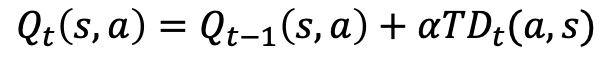

In [ ]:
random.uniform(0, 1)

0.35171589313437146

In [ ]:
env.action_space

Discrete(6)

In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(500, 6)

In [ ]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
np.argmax(np.array([3, 5]))

1

In [ ]:
# 1-10% 3-90%
# exploration / exploitation
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff
%%time
from IPython.display import clear_output

alpha = 0.1
gamma = 0.6
epsilon = 0.1

for i in range(100000):
  estado = env.reset()

  penalidades, recompensa = 0, 0
  done = False
  while not done:
    # Exploração
    if random.uniform(0, 1) < epsilon:
      acao = env.action_space.sample()
    # Exploitation
    else:
      acao = np.argmax(q_table[estado])

    proximo_estado, recompensa, done, info = env.step(acao)

    q_antigo = q_table[estado, acao]
    proximo_maximo = np.max(q_table[proximo_estado])

    q_novo = (1 - alpha) * q_antigo + alpha * (recompensa + gamma * proximo_maximo)
    q_table[estado, acao] = q_novo

    if recompensa == -10:
      penalidades += 1

    estado = proximo_estado

  if i % 100 == 0:
    clear_output(wait=True)
    print('Episódio: ', i)

print('Treinamento concluído')

Episódio:  99900
Treinamento concluído
CPU times: user 56.7 s, sys: 5.47 s, total: 1min 2s
Wall time: 1min 2s


In [ ]:
# 0 = south 1 = north 2 = east 3 = west 4 = pickup 5 = dropoff
q_table[346]

array([ -2.49301046,  -2.48236806,  -2.48841845,  -2.49308022,
       -11.1342322 , -10.96860217])

In [ ]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [ ]:
env.step(1)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [ ]:
env.encode(3, 2, 1, 2)

346

## Avaliação

In [ ]:
total_penalidades = 0
episodios = 50
frames = []

for _ in range(episodios):
  estado = env.reset()
  penalidades, recompensa = 0, 0
  done = False
  while not done:
    acao = np.argmax(q_table[estado])
    estado, recompensa, done, info = env.step(acao)

    if recompensa == -10:
      penalidades += 1

    frames.append({
        'frame': env.render(mode='ansi'),
        'state': estado,
        'action': acao,
        'reward': recompensa
    })

  total_penalidades += penalidades

print('Episódios', episodios)
print('Penalidades', total_penalidades)

Episódios 50
Penalidades 0


In [ ]:
frames[0]

{'frame': '+---------+\n|\x1bR\x1b: | : :\x1bG\x1b|\n| : | :\x1b \x1b: |\n| : : : : |\n| | : | : |\n|Y| : |B: |\n+---------+\n  (North)\n',
 'state': 164,
 'action': 1,
 'reward': -1}

In [ ]:
from time import sleep
for frame in frames:
  clear_output(wait=True)
  print(frame['frame'])
  print('Estado', frame['state'])
  print('Ação', frame['action'])
  print('Recompensa', frame['reward'])
  sleep(.5)

+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Estado 277
Ação 2
Recompensa -1
